In [1]:
import numpy as np
import roomacoustics.analytic as analytic

import matplotlib.pyplot as plt

In [49]:
L = np.array([8, 5, 3])/10
zetas = np.ones((3, 2)) * 100

c = 343.9

r_R = np.array([3.3, 1.6, 1.8])/10
r_S = np.array([5.3, 3.6, 1.2])/10

f_max = 1e3

samplingrate = 2200
n_samples = 2**10
freqs = np.fft.rfftfreq(n_samples, 1/samplingrate)
ks = 2*np.pi*freqs/c

In [50]:
k_ns, mode_idx = analytic.eigenfrequencies_rectangular_room_impedance(
    L, ks, f_max*2*np.pi/c, zetas, only_normal=True)

In [51]:
mask = np.prod(np.array([0,0,0]) == mode_idx, axis=-1) == 1

In [52]:
rir, spec, k_ns = analytic.rectangular_room_impedance(
    L, r_S, r_R, zetas, f_max, samplingrate, c, n_samples, remove_cavity_mode=False)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    0.3s finished


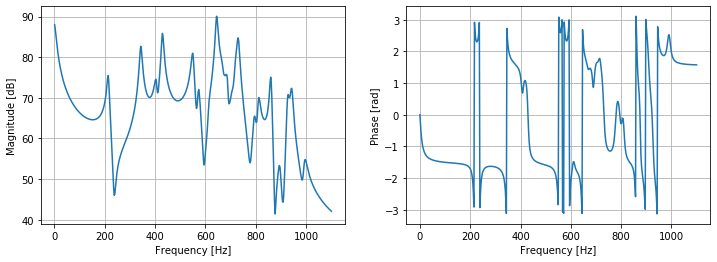

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freqs, 20*np.log10(np.abs(spec)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Frequency [Hz]")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(freqs, (np.angle(spec)))
plt.grid(True)
ax = plt.gca()
ax.set_ylabel("Phase [rad]")
ax.set_xlabel("Frequency [Hz]");

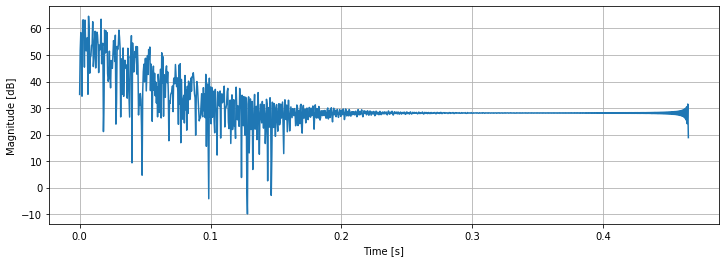

In [54]:
times = np.arange(0, n_samples)/samplingrate

plt.figure(figsize=(12, 4))
plt.plot(times, 20*np.log10(np.abs(rir)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Time [s]")
plt.grid(True)

In [55]:
# np.save('../data/analytic_rtf_impedance.npy', spec)
# np.save('../data/analytic_rir_impedance.npy', rir)

In [56]:
rir_rem, spec_rem, k_ns_rem = analytic.rectangular_room_impedance(
    L, r_S, r_R, zetas, f_max, samplingrate, c, n_samples, remove_cavity_mode=True)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    0.2s finished


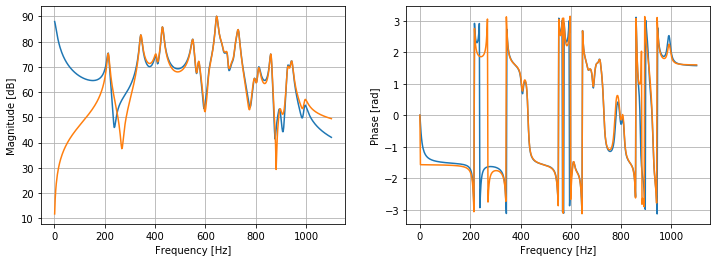

In [57]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freqs, 20*np.log10(np.abs(spec)))
plt.plot(freqs, 20*np.log10(np.abs(spec_rem)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Frequency [Hz]")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(freqs, (np.angle(spec)))
plt.plot(freqs, (np.angle(spec_rem)))
plt.grid(True)
ax = plt.gca()
ax.set_ylabel("Phase [rad]")
ax.set_xlabel("Frequency [Hz]");

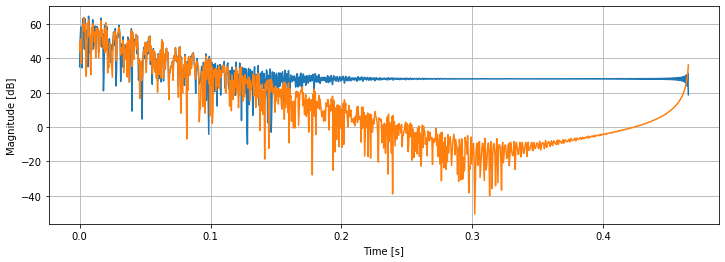

In [58]:
times = np.arange(0, n_samples)/samplingrate

plt.figure(figsize=(12, 4))
plt.plot(times, 20*np.log10(np.abs(rir)))
plt.plot(times, 20*np.log10(np.abs(rir_rem)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Time [s]")
plt.grid(True)

In [59]:
# np.save('../data/analytic_rtf_impedance_no_cav.npy', spec_rem)
# np.save('../data/analytic_rir_impedance_no_cav.npy', rir_rem)

In [60]:
zetas = np.ones((3, 2, 513)) * 1e10
h_x = analytic.multipoles_modal_superposition(
    ks, ks*c, k_ns, mode_idx, r_R, r_S, L, zetas)

In [61]:
h_x.shape

(4, 513)

In [62]:
velocity = h_x[1:] * -1/(freqs*2*np.pi*1.2)

In [63]:
intensity = np.real(h_x[0] * velocity.conj())/2

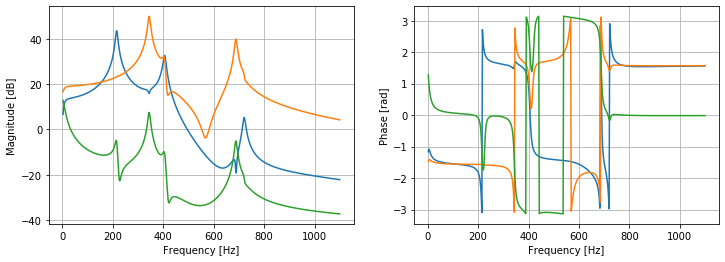

In [64]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freqs, 20*np.log10(np.abs(velocity.T)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Frequency [Hz]")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(freqs, (np.angle(velocity.T)))
plt.grid(True)
ax = plt.gca()
ax.set_ylabel("Phase [rad]")
ax.set_xlabel("Frequency [Hz]");

In [65]:
res_R = 10
x_R = np.linspace(0.01, L[0]-0.01, res_R)
y_R = np.linspace(0.01, L[1]-0.01, res_R)
r_R_x, r_R_y = np.meshgrid(x_R, y_R)


In [66]:
r_R_z = np.ones(res_R**2)

In [67]:
r_R = np.vstack((r_R_x.flatten(), r_R_y.flatten(), r_R_z.flatten())).T
r_R.shape

(100, 3)

In [68]:

zetas = np.ones((3, 2, 513)) * 1e10
h_x = analytic.multipoles_modal_superposition(
    ks, ks*c, k_ns, mode_idx, r_R, r_S, L, zetas)

In [69]:
h_x.shape

(4, 100, 513)

In [94]:
velocity = h_x[1:] * 1/(1j*freqs*2*np.pi*1.2)

In [101]:
intensity = np.real(h_x[0] * velocity.conj())/2
intensity_reactive = np.imag(h_x[0] * velocity.conj())/2

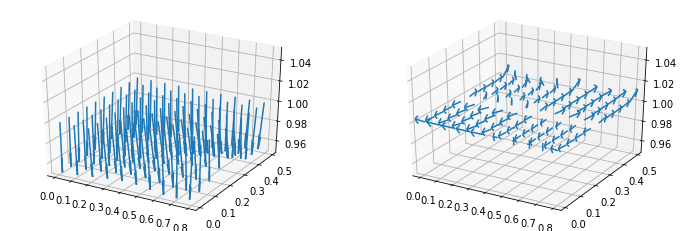

In [103]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(12, 4))
ax_re = plt.subplot(1,2,1, projection='3d')
ax_im = plt.subplot(1,2,2, projection='3d')

ax_re.quiver(
    r_R_x.flatten(),
    r_R_y.flatten(),
    r_R_z.flatten(),
    np.nanmean(intensity[0, :, :], axis=-1),
    np.nanmean(intensity[1, :, :], axis=-1),
    np.nanmean(intensity[2, :, :], axis=-1),
    length=0.05,
    normalize=True)

ax_im.quiver(
    r_R_x.flatten(),
    r_R_y.flatten(),
    r_R_z.flatten(),
    np.nanmean(intensity_reactive[0, :, :], axis=-1),
    np.nanmean(intensity_reactive[1, :, :], axis=-1),
    np.nanmean(intensity_reactive[2, :, :], axis=-1),
    length=0.05,
    normalize=True)